# Part I: Setting Up Your Dataset and Descriptive Statistics

## Question 1

In [86]:
##Imports
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from math import sqrt

In [2]:
#Creating Dataframes from the requested csv files
calendar_df = pd.read_csv("calendar.csv")
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")

#Print out some parts of the dataframe for testing purposes
print(listings_df)
print(listings_df['review_scores_value'])
print(listings_df['calculated_host_listings_count'])
print(listings_df['reviews_per_month'])

      listing_id                            listing_url     scrape_id  \
0       12147973  https://www.airbnb.com/rooms/12147973  2.020000e+13   
1        3075044   https://www.airbnb.com/rooms/3075044  2.020000e+13   
2           6976      https://www.airbnb.com/rooms/6976  2.020000e+13   
3        1436513   https://www.airbnb.com/rooms/1436513  2.020000e+13   
4        7651065   https://www.airbnb.com/rooms/7651065  2.020000e+13   
...          ...                                    ...           ...   
3580     8373729   https://www.airbnb.com/rooms/8373729  2.020000e+13   
3581    14844274  https://www.airbnb.com/rooms/14844274  2.020000e+13   
3582    14585486  https://www.airbnb.com/rooms/14585486  2.020000e+13   
3583    14603878  https://www.airbnb.com/rooms/14603878  2.020000e+13   
3584    14504422  https://www.airbnb.com/rooms/14504422  2.020000e+13   

     last_scraped                                           name  \
0          9/7/16                     Sunny Bungalow in

In [3]:
#Create a list that tells if a value is na in the host_response_rate column of the listings_df
nalist = listings_df['host_response_rate'].isna()

#Percent to Float function
def p2f(x):
    return float(x.strip('%'))/100

#Price to Float function
def price(x):
    n=0
    nalist = x.isna()
    
    #While loop that checks first if a value is na before replacing and striping certain parts of the price string and converting to a float
    while n < len(listings_df):
        if nalist[n] == True:
            n+=1
        else:
            x[n] = x[n].replace(',', '')
            x[n] = x[n].strip('$')
            x[n] = float(x[n].strip(' '))
            n+=1

# Converter function that runs in conjunction with the p2f function where data frame columns are run through and converted into floats from string percents            
def converter(x):
    n=0
    nalist = x.isna()
    while n < len(listings_df):
        if nalist[n] == True:
            n+=1
        else:    
            x[n] = p2f(x[n])
            n+=1

#Running necessary columns through the required functions           
converter(listings_df['host_response_rate'])
converter(listings_df['host_acceptance_rate'])
price(listings_df['price'])
price(listings_df['weekly_price'])
price(listings_df['monthly_price'])
price(listings_df['security_deposit'])
price(listings_df['cleaning_fee'])
price(listings_df['extra_people'])

<ipython-input-3-b96577a31901>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[n] = p2f(x[n])
<ipython-input-3-b96577a31901>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[n] = x[n].replace(',', '')
<ipython-input-3-b96577a31901>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[n] = x[n].strip('$')
<ipython-input-3-b96577a31901>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [4]:
#Creating a list of variables
variables = ['host_acceptance_rate', 'host_listings_count',
'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_90',
'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
'review_scores_value', 'reviews_per_month']

#Creating table headers
table = PrettyTable(["Variables", "Minimum", "Maximum", "Mean", "Median", "Variance", "Std. Deviation"])

#Creating a while loop that will create a new row of data in the table for every string in the variables list
n=0
while n < len(variables):
    table.add_row([variables[n], listings_df[variables[n]].min(), listings_df[variables[n]].max(),
                   listings_df[variables[n]].mean(), listings_df[variables[n]].median(), 
                   listings_df[variables[n]].var(), listings_df[variables[n]].std()])
    n+=1
    
print(table)

+-----------------------------+---------+----------+--------------------+--------+----------------------+---------------------+
|          Variables          | Minimum | Maximum  |        Mean        | Median |       Variance       |    Std. Deviation   |
+-----------------------------+---------+----------+--------------------+--------+----------------------+---------------------+
|     host_acceptance_rate    |   0.0   |   1.0    | 0.8417308927424536 |  0.94  | 0.047433591547741134 | 0.21779254245208016 |
|     host_listings_count     |    0    |   749    |  58.9023709902371  |  2.0   |  29281.939126631325  |  171.11966317940005 |
|  host_total_listings_count  |    0    |   749    |  58.9023709902371  |  2.0   |  29281.939126631325  |  171.11966317940005 |
|         accommodates        |    1    |    16    | 3.0412831241283125 |  2.0   |  3.164589870990262   |  1.7789294170905887 |
|          bathrooms          |   0.0   |   6.0    | 1.221646597591711  |  1.0   |  0.2514892767524199  

#### Yes there are some strange variables in this dataset. host_listings_count and host_listings_total_count both have a mean of 58.9, but have a median of 2 which suggests that the data is very skewed to the left. The variance for each of these variables is also 29281.9 which is extremely high for the data having a maximum of 749. Another strange variable is maximum_nights which has a max of 99999999 and a mean of 28725.8 and a median of 1125. The variance is also ridiculous at 2789354050349.2, which makes this variable hard to work with.

# Part II: Sentiment Analysis and Adding New Data

## Question 2

In [5]:
#Creating named columns to identify data later on
sentiment_analysis_columns = ['negativity', 'neutrality', 'positivity', 'compound']

#file_name is a column from a dataframe in this case
file_names = [reviews_df['comments']]

#initializing the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

#Creating more necessary lists and combining all the columns previously created
expanded_text_dataset = []
all_columns = [reviews_df['comments']] + sentiment_analysis_columns
text_segment_list = list(reviews_df['comments'])

#Extracting row information from the comments column
for j in range(len(text_segment_list)):
    row_info = list(reviews_df.iloc[j])
    text = text_segment_list[j]
    
    #trying sentiment analysis for each row of data and storing that value into the relative column
    try:
        ss = sid.polarity_scores(text)
        negativity = ss['neg']
        neutrality = ss['neu']
        positivity = ss['pos']
        compound = ss['compound']
        temp_data = row_info + [negativity, neutrality, positivity, compound]
        expanded_text_dataset.append(temp_data)
        
    #If there is no comment available then the sentiment analysis will create NA values for all output columns
    except:
        print('Sentiment analysis not done: ' + str(j) + ' / ' + str(len(reviews_df['comments'])))
        temp_data = row_info + ['NA', 'NA', 'NA', 'NA']
        expanded_text_dataset.append(temp_data)

Sentiment analysis not done: 1077 / 68275
Sentiment analysis not done: 2786 / 68275
Sentiment analysis not done: 7483 / 68275
Sentiment analysis not done: 7827 / 68275
Sentiment analysis not done: 8362 / 68275
Sentiment analysis not done: 11415 / 68275
Sentiment analysis not done: 11745 / 68275
Sentiment analysis not done: 13838 / 68275
Sentiment analysis not done: 14131 / 68275
Sentiment analysis not done: 16185 / 68275
Sentiment analysis not done: 18191 / 68275
Sentiment analysis not done: 19098 / 68275
Sentiment analysis not done: 19986 / 68275
Sentiment analysis not done: 21122 / 68275
Sentiment analysis not done: 21720 / 68275
Sentiment analysis not done: 22215 / 68275
Sentiment analysis not done: 25043 / 68275
Sentiment analysis not done: 25446 / 68275
Sentiment analysis not done: 26939 / 68275
Sentiment analysis not done: 27128 / 68275
Sentiment analysis not done: 28326 / 68275
Sentiment analysis not done: 31537 / 68275
Sentiment analysis not done: 32174 / 68275
Sentiment analys

In [6]:
i=0

#Creating lists to be used create new columns in the reviews_df
neg = []
neu = []
pos = []
com = []

#Using a while loop to append all of the necessary values to each of the empty lists
while i < 68275:
    
    neg.append(expanded_text_dataset[i][6])
    neu.append(expanded_text_dataset[i][7])
    pos.append(expanded_text_dataset[i][8])
    com.append(expanded_text_dataset[i][9])
    i+=1

#Creating a new column in the reviews_df based off of all of the lists created
reviews_df['Negative'] = neg    
reviews_df['Neutral'] = neu    
reviews_df['Positive'] = pos
reviews_df['Compound'] = com

In [7]:
#Reading in positive and negative words through csv files
positive_words = pd.read_csv("positive_words.csv", header = None, encoding = 'latin-1')
negative_words = pd.read_csv("negative_words.csv", header = None, encoding = 'latin-1')

#Creating empty lists for positive and negative to determine ratios in each comment
pos_list = []
neg_list = []

#for loop to extract each comment from the column of comments in reviews_df
for comment in reviews_df['comments']:

    temp_pos = 0
    temp_neg = 0
    words = 0
    
    #try to seperate each word from the comment
    try:
        for word in comment.split():
            
            #To track number of total words
            words+=1
            
            #For loop to iterate through all the positive words and compare them to the words in the comment
            for nice in positive_words[0]:
                
                #if the word is the same then the number is tracked with a temporary count
                if word == nice:
                    temp_pos += 1
                else:
                    temp_pos = temp_pos
                
            #For loop to iterate through all the negative words and compare them to the words in the comment
            for not_nice in negative_words[0]:
                
                #if the word is the same then the number is tracked with a temporary count
                if word == not_nice:
                    temp_neg += 1
                else:
                    temp_neg = temp_neg
        #When each comment is iterated through fully, the ratio of positive/negative words to total words is appended to their respective list
        pos_list.append(temp_pos/words)
        neg_list.append(temp_neg/words)
    
    #If there is an exception then there is no comment available
    except:
        print("No Comment")
        pos_list.append('NA')
        neg_list.append('NA')

No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment
No Comment


In [8]:
#Create new columns in the reviews_df out of the newly formed lists
reviews_df['positivity_simple'] = pos_list
reviews_df['negativity_simple'] = neg_list

## Question 3

In [9]:
#Create two dictionaries to keep track of sum of values and total number of values to be used together later
sum_dict = {}
total_dict = {}
i=0

#while loop to iterate through all of the reviews_df
while i < len(reviews_df):
    
    #check if listing_id exists in the dictionaries
    if reviews_df['listing_id'][i] in sum_dict.keys():
        
        #check if positivity_simple is a non NA value
        if reviews_df['positivity_simple'][i] != 'NA':
            
            #check if positivity_simple is a key that exists for the specific listing_id
            if 'positivity_simple' in sum_dict[reviews_df['listing_id'][i]].keys():
                
                #Add new values to the positivity_simple key of the listing_id key
                sum_dict[reviews_df['listing_id'][i]]['positivity_simple'] = sum_dict[reviews_df['listing_id'][i]]['positivity_simple'] + reviews_df['positivity_simple'][i]
                total_dict[reviews_df['listing_id'][i]]['positivity_simple'] = total_dict[reviews_df['listing_id'][i]]['positivity_simple'] + 1
            else:
                
                #Creating a new key positivity_simple within the specificied listing_id
                sum_dict[reviews_df['listing_id'][i]]['positivity_simple'] = reviews_df['positivity_simple'][i]
                total_dict[reviews_df['listing_id'][i]]['positivity_simple'] = 1
        else:
            print("test")
        
        #check if negativity_simple is a non NA value
        if reviews_df['negativity_simple'][i] != 'NA':
            
            #check if negativity_simple is a key that exists for the specific listing_id
            if 'negativity_simple' in sum_dict[reviews_df['listing_id'][i]].keys():
                
                #Add new values to the negativity_simple key of the listing_id key
                sum_dict[reviews_df['listing_id'][i]]['negativity_simple'] = sum_dict[reviews_df['listing_id'][i]]['negativity_simple'] + reviews_df['negativity_simple'][i]
                total_dict[reviews_df['listing_id'][i]]['negativity_simple'] = total_dict[reviews_df['listing_id'][i]]['negativity_simple'] + 1
            else:
                
                 #Creating a new key negativity_simple within the specificied listing_id
                sum_dict[reviews_df['listing_id'][i]]['negativity_simple'] = reviews_df['negativity_simple'][i]
                total_dict[reviews_df['listing_id'][i]]['negativity_simple'] = 1
        else:
            print("test")

    else:
        
        #create a new key in each dict for the new listing_id
        sum_dict[reviews_df['listing_id'][i]] = {}
        total_dict[reviews_df['listing_id'][i]] = {}
        
        #check if positivity_simple is a non NA value
        if reviews_df['positivity_simple'][i] != 'NA':
            
            #Creating a new key positivity_simple within the specificied listing_id
            sum_dict[reviews_df['listing_id'][i]]['positivity_simple'] = reviews_df['positivity_simple'][i]
            total_dict[reviews_df['listing_id'][i]]['positivity_simple'] = 1
        else:
            print("test")
        
        #check if negativity_simple is a non NA value
        if reviews_df['negativity_simple'][i] != 'NA':
            
            #Creating a new key negativity_simple within the specificied listing_id
            sum_dict[reviews_df['listing_id'][i]]['negativity_simple'] = reviews_df['negativity_simple'][i]
            total_dict[reviews_df['listing_id'][i]]['negativity_simple'] = 1
        else:
            print("test")
        
    i += 1

test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test


In [10]:
i = 0

#Use a while loop to iterate through all of the reviews_df
while i < len(reviews_df):
    
    #check if the Positive value in reviews_df is non NA
    if reviews_df['Positive'][i] != 'NA':
        
        #check if Positive is a key that exists for the specific listing_id in the dict
        if 'Positive' in sum_dict[reviews_df['listing_id'][i]].keys():
            
            #Add values to the Positive key within the listing_id key
            sum_dict[reviews_df['listing_id'][i]]['Positive'] = sum_dict[reviews_df['listing_id'][i]]['Positive'] + reviews_df['Positive'][i]
            total_dict[reviews_df['listing_id'][i]]['Positive'] = total_dict[reviews_df['listing_id'][i]]['Positive'] + 1
        else:
            
            #Create a new key Positive for the specified listing_id for each dict
            sum_dict[reviews_df['listing_id'][i]]['Positive'] = reviews_df['Positive'][i]
            total_dict[reviews_df['listing_id'][i]]['Positive'] = 1
    else:
        print("test")
    
    #check if the Negative value in reviews_df is non NA
    if reviews_df['Negative'][i] != 'NA':
        
        #check if Negative is a key that exists for the specific listing_id in the dict
        if 'Negative' in sum_dict[reviews_df['listing_id'][i]].keys():
            
            #Add values to the Negative key within the listing_id key
            sum_dict[reviews_df['listing_id'][i]]['Negative'] = sum_dict[reviews_df['listing_id'][i]]['Negative'] + reviews_df['Negative'][i]
            total_dict[reviews_df['listing_id'][i]]['Negative'] = total_dict[reviews_df['listing_id'][i]]['Negative'] + 1
        else:
            
            #Create a new key Negative for the specified listing_id for each dict
            sum_dict[reviews_df['listing_id'][i]]['Negative'] = reviews_df['Negative'][i]
            total_dict[reviews_df['listing_id'][i]]['Negative'] = 1
    else:
        print("test")
        
    #check if the Neutral value in reviews_df is non NA
    if reviews_df['Neutral'][i] != 'NA':
        
        #check if Neutral is a key that exists for the specific listing_id in the dict
        if 'Neutral' in sum_dict[reviews_df['listing_id'][i]].keys():
            
            #Add values to the Neutral key within the listing_id key
            sum_dict[reviews_df['listing_id'][i]]['Neutral'] = sum_dict[reviews_df['listing_id'][i]]['Neutral'] + reviews_df['Neutral'][i]
            total_dict[reviews_df['listing_id'][i]]['Neutral'] = total_dict[reviews_df['listing_id'][i]]['Neutral'] + 1
        else:
            
            #Create a new key Neutral for the specified listing_id for each dict
            sum_dict[reviews_df['listing_id'][i]]['Neutral'] = reviews_df['Neutral'][i]
            total_dict[reviews_df['listing_id'][i]]['Neutral'] = 1
    else:
        print("test")
        
    #check if the Compound value in reviews_df is non NA
    if reviews_df['Compound'][i] != 'NA':
        
        #check if Compound is a key that exists for the specific listing_id in the dict
        if 'Compound' in sum_dict[reviews_df['listing_id'][i]].keys():
            
            #Add values to the Compound key within the listing_id key
            sum_dict[reviews_df['listing_id'][i]]['Compound'] = sum_dict[reviews_df['listing_id'][i]]['Compound'] + reviews_df['Compound'][i]
            total_dict[reviews_df['listing_id'][i]]['Compound'] = total_dict[reviews_df['listing_id'][i]]['Compound'] + 1
        else:
            
            #Create a new key Compound for the specified listing_id for each dict
            sum_dict[reviews_df['listing_id'][i]]['Compound'] = reviews_df['Compound'][i]
            total_dict[reviews_df['listing_id'][i]]['Compound'] = 1
    else:
        print("test")
    
    i+=1

test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test


In [11]:
#Creating six empty columns in the reviews_df
listings_df["negativity_mean"] = ""
listings_df["neutrality_mean"] = ""
listings_df["positivity_mean"] = ""
listings_df["compound_mean"] = ""
listings_df["positivity_simple_mean"] = ""
listings_df["negativity_simple_mean"] = ""

#new mean dict
mean_dict = {}

#for key to iterate through each listing_id
for key in sum_dict:
    
    #Creating each listing_id as a key in the mean_dict
    mean_dict[key] = {}
    
    #Iterating through each key within each listing_id for sum_dict
    for key2 in sum_dict[key]:
        
        #Creating new key in mean_dict that contains the value of the sum of all values divided by the total number of values
        mean_dict[key][key2] = sum_dict[key][key2] / total_dict[key][key2]

In [12]:
#Iterate through each listing_id in the mean_dict
for key in mean_dict:
    i = 0 
    
    #while loop to iterate through the listings_df
    while i < len(listings_df):
        
        #find the key that matches up to each listing_id
        if key == listings_df["listing_id"][i]:
            
            #add all of the values from the mean_dict as values to the empty columns in listings_df
            listings_df["negativity_mean"][i] = mean_dict[key]["Negative"]
            listings_df["neutrality_mean"][i] = mean_dict[key]["Neutral"]
            listings_df["positivity_mean"][i] = mean_dict[key]["Positive"]
            listings_df["compound_mean"][i] = mean_dict[key]["Compound"]
            listings_df["positivity_simple_mean"][i] = mean_dict[key]["positivity_simple"]
            listings_df["negativity_simple_mean"][i] = mean_dict[key]["negativity_simple"]
        else:
            nothing = 0
        i += 1

<ipython-input-12-a91b07b7af07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df["negativity_mean"][i] = mean_dict[key]["Negative"]
<ipython-input-12-a91b07b7af07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df["neutrality_mean"][i] = mean_dict[key]["Neutral"]
<ipython-input-12-a91b07b7af07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df["positivity_mean"][i] = mean_dict[key]["Positive"]
<ipython

# Part III: Data Mining

## Question 4

In [13]:
##Copy the listings_df dataframe to only include the required features
listings_df_copy = listings_df[["property_type", "room_type", "accommodates", "bathrooms", "bedrooms"]].copy()

##One_Hot encoding each feature at which we need to look, starting with property_type
listings_df_ptypes = pd.get_dummies(listings_df_copy["property_type"], prefix = "property_type")
##Concatenating listing_id for my own reference
#listings_df_ptypes = pd.concat([listings_df["listing_id"], listings_df_ptypes], axis = 1)

##Now room_type
listings_df_rtypes = pd.get_dummies(listings_df_copy["room_type"], prefix = "room_type")
listings_df_1h = pd.concat([listings_df_ptypes, listings_df_rtypes], axis = 1)
listings_df_1h

##Now accomodates
listings_df_acc = pd.get_dummies(listings_df_copy["accommodates"], prefix = "accommodates")
listings_df_1h = pd.concat([listings_df_1h, listings_df_acc], axis = 1)
listings_df_1h

##Now bathrooms
listings_df_bath = pd.get_dummies(listings_df_copy["bathrooms"], prefix = "bathrooms")
listings_df_1h = pd.concat([listings_df_1h, listings_df_bath], axis = 1)
listings_df_1h

##And finally, bedrooms
listings_df_bed = pd.get_dummies(listings_df_copy["bedrooms"], prefix = "bedrooms")
listings_df_1h = pd.concat([listings_df_1h, listings_df_bed], axis = 1)
listings_df_1h

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,...,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bedrooms_0.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3581,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3582,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3583,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
##Actually do the mlxtend package's Apriori algorithm when min_sup = 0.1
apriori_1 = apriori(listings_df_1h, min_support = 0.1, use_colnames = True)
apriori_1.sort_values(by = ["support"], ascending = False)

,support,itemsets
8,0.767364,(bathrooms_1.0)
0,0.728591,(property_type_Apartment)
10,0.663598,(bedrooms_1.0)
16,0.597768,"(property_type_Apartment, bathrooms_1.0)"
2,0.593305,(room_type_Entire home/apt)
...,...,...
56,0.102929,"(bedrooms_1.0, accommodates_1, room_type_Priva..."
27,0.102929,"(accommodates_1, room_type_Private room)"
24,0.101255,"(bathrooms_2.0, room_type_Entire home/apt)"
55,0.100418,"(room_type_Entire home/apt, bathrooms_1.0, bed..."


In [77]:
##Same as above, but min_sup = 0.2
apriori_2 = apriori(listings_df_1h, min_support = 0.2, use_colnames = True)
apriori_2.sort_values(by = ["support"], ascending = False)

,support,itemsets
4,0.767364,(bathrooms_1.0)
0,0.728591,(property_type_Apartment)
5,0.663598,(bedrooms_1.0)
9,0.597768,"(property_type_Apartment, bathrooms_1.0)"
1,0.593305,(room_type_Entire home/apt)
18,0.567922,"(bedrooms_1.0, bathrooms_1.0)"
6,0.492050,"(property_type_Apartment, room_type_Entire hom..."
10,0.461646,"(property_type_Apartment, bedrooms_1.0)"
11,0.446583,"(room_type_Entire home/apt, bathrooms_1.0)"
24,0.427615,"(property_type_Apartment, bedrooms_1.0, bathro..."


## Question 5

In [16]:
def calc_support(df, col_list, k):
    og_len = len(df)
    for c in col_list:
        df = df.loc[df[c] == 1.0]
    return (len(df)/og_len)

In [17]:
def apriori_gen(L_k, k):
    for p1 in L_k:
        print(p1)
        for p2 in L_k:
            if(p1 != p2):
                #split up p1 and p2
                p1 = p1.split(", ")
                p2 = p2.split(", ")
                for c in range(0, len(p2)):
                    p1.append(p2.pop(0))
                #add the items from p1 and p2 into a set (should get rid of duplicates)
                #candidate = set(p1)
                candidate = dict()
                #for c in p1:
                   # candidate.add(c)
                if(len(candidate) == k - 1):
                    candidate[str(p1) + ", " + str(p2)] = 0
        #take each item from the set and add it to a dictionary as a string ("blah, blah, blah" or something similar)
    #return the dictionary
    return (candidate)

In [46]:
def apriori_from_scratch(df, min_sup):
    #L1 = find_frequent_one_itemsets(D) //basically append the column names of the one-hot encoded dataframe
    L_1 = {}
    col_list = []
    for c in df.columns:
        temp_col = str(c)
        col_list.append(temp_col)
        sup = calc_support(df, col_list, 1)
        if(sup >= min_sup):
            L_1[c] = sup
        col_list.pop(0)
    L_k = L_1.copy()
    #found = boolean that is true if there exists a subset of size k that has a support greater than min_sup
    found = True
    k = 1
    final = L_1.copy()
    while(found == True):
        found = False
        L_k = apriori_gen(list(L_k.keys()), k)
        k += 1
        for c in L_k.keys():
            col_list = c.split(", ")
            sup = calc_support(df, col_list, k)
    #return (L = U_k * L_k)
    return (final)

In [47]:
apriori_from_scratch(listings_df_1h, 0.1)

{'property_type_Apartment': 0.7285913528591352,
 'property_type_House': 0.15676429567642958,
 'room_type_Entire home/apt': 0.5933054393305439,
 'room_type_Private room': 0.38437935843793586,
 'accommodates_1': 0.12245467224546723,
 'accommodates_2': 0.4136680613668061,
 'accommodates_3': 0.1193863319386332,
 'accommodates_4': 0.18131101813110181,
 'bathrooms_1.0': 0.7673640167364016,
 'bathrooms_2.0': 0.13333333333333333,
 'bedrooms_1.0': 0.6635983263598326,
 'bedrooms_2.0': 0.19330543933054392}

In [48]:
apriori_from_scratch(listings_df_1h, 0.2)

{'property_type_Apartment': 0.7285913528591352,
 'room_type_Entire home/apt': 0.5933054393305439,
 'room_type_Private room': 0.38437935843793586,
 'accommodates_2': 0.4136680613668061,
 'bathrooms_1.0': 0.7673640167364016,
 'bedrooms_1.0': 0.6635983263598326}

# Part IV: Linear Regression

## Question 6

In [20]:
%matplotlib inline

In [21]:
##Set seed
np.random.seed(99)

##Initialie dataframe with all features needed for OLS
lin_reg = listings_df[["host_response_rate", "review_scores_rating", "review_scores_accuracy", 
                       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
                       "positivity_mean", "negativity_mean", "positivity_simple_mean", "negativity_simple_mean", 
                       "price"]]

##Change values that are empty strings to NaN
for c in range(0, len(lin_reg["positivity_mean"])):
    if(lin_reg.loc[c].at["positivity_mean"] == ""):
        lin_reg.at[c, "positivity_mean"] = np.nan
        lin_reg.at[c, "negativity_mean"] = np.nan
        lin_reg.at[c, "positivity_simple_mean"] = np.nan
        lin_reg.at[c, "negativity_simple_mean"] = np.nan

##Then change the NaNs to the mean of each column
for c in lin_reg:
    lin_reg[c].fillna(lin_reg[c].mean(),inplace=True)

##Fit and summarize OLS model
model = sm.OLS(lin_reg["price"], lin_reg[["host_response_rate", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "positivity_mean", "negativity_mean", "positivity_simple_mean", "negativity_simple_mean",]])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              501.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:13:36   Log-Likelihood:                         -22988.
No. Observations:                3585   AIC:                                  4.600e+04
Df Residuals:                    3575   BIC:                                  4.606e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

/Users/jasper_lemberg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


The coefficients of each variable are 16.4218, 1.4096, -8.6753, 17.3606, -6.6749, 0.6594, 3.3624, 57.5541, 25.4978, and 840.9567. The R-squared value of this OLS model is 0.584 and the adjusted R-squared is 0.583. The coefficients that are statistically significant are review_scores_rating, review_scores_accuracy, and review_scores_cleanliness because their respective p-values (0.015, 0.047, and 0.000) are less than 0.05.

It is not surprising that these variables are significant. Higher-rated and cleaner Airbnbs most likely mean that they are more luxurious and, therefore, cost more. Also, property owners would be less likely to lie about their properties if they are more expensive because the customers are already paying so much, so that variable being significant makes sense as well. However, it is surprising that positivity_mean and positivity_simple_mean are very insignificant because it seems that if a review is more positive, it would incentivize raising the price because there would be more demand for that specific Airbnb. However, the two variables seem more or less independent, so the significance is negligible.

In [95]:
##Calculate two column's Pearson's correlation
def cal_corr(col_1, col_2):
    x_vals = 0
    y_vals = 0
    numerator = 0
    for c, c2 in zip(col_1, col_2):
        x_vals += (c - col_1.mean())**2
        y_vals += (c2 - col_2.mean())**2
        numerator += (c - col_1.mean()) * (c2 - col_2.mean())
    return (numerator/sqrt(x_vals * y_vals))

In [103]:
##Every column's correlation related to price (used in lab report)
for c in lin_reg.columns:
    if(c != "price"):
        print("" + c + "-price correlation: ")
        print(cal_corr(lin_reg[c], lin_reg["price"]))
        print()

host_response_rate-price correlation: 
-0.005680453984160732

review_scores_rating-price correlation: 
0.07075344894763971

review_scores_accuracy-price correlation: 
0.02756611906230532

review_scores_cleanliness-price correlation: 
0.09808746471267853

review_scores_checkin-price correlation: 
-0.0025768467517466765

review_scores_communication-price correlation: 
0.002418811006996025

positivity_mean-price correlation: 
0.024391948161045007

negativity_mean-price correlation: 
-0.02804433565465992

positivity_simple_mean-price correlation: 
0.014094208470465244

negativity_simple_mean-price correlation: 
-0.010516633701875673



## Question 7

In [37]:
##Split lin_reg into X and y
X = lin_reg[["host_response_rate", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
            "review_scores_checkin", "review_scores_communication", "positivity_mean", "negativity_mean", 
            "positivity_simple_mean", "negativity_simple_mean"]]
y = lin_reg["price"]

##Split X and y into training and testing sets via 5-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Standardize the X values by using the StandardScaler() function of sklearn package
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Apply the PCA function of sklearn to the training and testing sets with n_components = 3
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

##Fit linear regression and report coefficients
model_pca = sm.OLS(y_train, X_train)
results_pca = model_pca.fit()
print(results_pca.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.136
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                       0.333
Time:                        11:49:59   Log-Likelihood:                         -19502.
No. Observations:                2868   AIC:                                  3.901e+04
Df Residuals:                    2865   BIC:                                  3.903e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficients of each variable are -3.7654, -0.2058, and -0.4094. The standard error values are 2.045, 3.353, and 3.624 respectively. This is less than all of the standard error values for Q6's coefficients except for review_scores_rating (0.579). However, the R-squared value is 0.001 and the adjusted R-squared value is 0.000. Thus, the model is fitted a lot worse to the data compared to the model from Q6. 

# Part V: Visualization

## Question 8

In [30]:
##Fill the blank values with NaN
listings_df_q8 = listings_df.copy()
for c in range(0, len(listings_df_q8["positivity_mean"])):
    if(listings_df_q8.loc[c].at["positivity_mean"] == ""):
        listings_df_q8.at[c, "negativity_mean"] = np.nan
        listings_df_q8.at[c, "neutrality_mean"] = np.nan
        listings_df_q8.at[c, "positivity_mean"] = np.nan
        listings_df_q8.at[c, "compound_mean"] = np.nan
        listings_df_q8.at[c, "positivity_simple_mean"] = np.nan
        listings_df_q8.at[c, "negativity_simple_mean"] = np.nan
listings_df_q8

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,negativity_mean,neutrality_mean,positivity_mean,compound_mean,positivity_simple_mean,negativity_simple_mean
0,12147973,https://www.airbnb.com/rooms/12147973,2.020000e+13,9/7/16,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.30,0.014,0.664056,0.321944,0.837644,0.085016,0.005188
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,t,f,1,0.47,0.010854,0.724488,0.264659,0.905349,0.078709,0.001326
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,f,1,1.00,0.0,0.516,0.484,0.9506,0.041667,0.0
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,f,1,2.25,0.017034,0.709069,0.273897,0.780959,0.084973,0.003509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,2.020000e+13,9/7/16,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,f,8,0.34,0.019,0.7615,0.2195,0.811475,0.033418,0.0
3581,14844274,https://www.airbnb.com/rooms/14844274,2.020000e+13,9/7/16,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,f,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,2.020000e+13,9/7/16,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,2.020000e+13,9/7/16,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,f,1,2.00,0.0,0.7205,0.2795,0.8997,0.119476,0.0


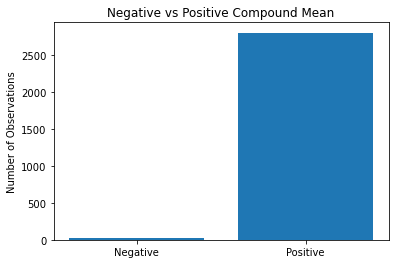

In [33]:
##Bar chart comparing observations where compound_mean < 0 and observations where compound_mean >= 0
##Axis labels
cmean_labels = ["Negative", "Positive"]
##People who survived vs people who did not
cmean_vals = [len(listings_df_q8.loc[listings_df_q8["compound_mean"] < 0]), 
              len(listings_df_q8.loc[listings_df_q8["compound_mean"] >= 0])]

##Negative vs Positive Compound Mean bar chart
plt.bar(cmean_labels, cmean_vals)
plt.title("Negative vs Positive Compound Mean")
plt.ylabel("Number of Observations")
plt.show()

In [93]:
##Initialize data frame with identical row names and column names. This is essentially the empty correlation matrix
X_corr_mat = pd.DataFrame(columns = X.columns, index = X.columns)

##Assign values to correlation matrix
for c in X_corr_mat.index:
    for c2 in X_corr_mat.columns:
        X_corr_mat.loc[c, c2] = cal_corr(X[c], X[c2])
X_corr_mat

,host_response_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,positivity_mean,negativity_mean,positivity_simple_mean,negativity_simple_mean
host_response_rate,1.0,0.057586,0.042445,0.057097,0.049215,0.065477,0.068079,-0.018247,0.044482,-0.015274
review_scores_rating,0.057586,1.0,0.70392,0.753547,0.583298,0.599477,0.31719,-0.441365,0.200969,-0.38554
review_scores_accuracy,0.042445,0.70392,1.0,0.643256,0.468073,0.492628,0.258105,-0.304614,0.166867,-0.214305
review_scores_cleanliness,0.057097,0.753547,0.643256,1.0,0.461001,0.427978,0.243248,-0.323556,0.148112,-0.257449
review_scores_checkin,0.049215,0.583298,0.468073,0.461001,1.0,0.672353,0.197586,-0.258099,0.138115,-0.198342
review_scores_communication,0.065477,0.599477,0.492628,0.427978,0.672353,1.0,0.196688,-0.292352,0.135016,-0.203472
positivity_mean,0.068079,0.31719,0.258105,0.243248,0.197586,0.196688,1.0,-0.221059,0.687154,-0.173393
negativity_mean,-0.018247,-0.441365,-0.304614,-0.323556,-0.258099,-0.292352,-0.221059,1.0,-0.179982,0.604088
positivity_simple_mean,0.044482,0.200969,0.166867,0.148112,0.138115,0.135016,0.687154,-0.179982,1.0,-0.146256
negativity_simple_mean,-0.015274,-0.38554,-0.214305,-0.257449,-0.198342,-0.203472,-0.173393,0.604088,-0.146256,1.0


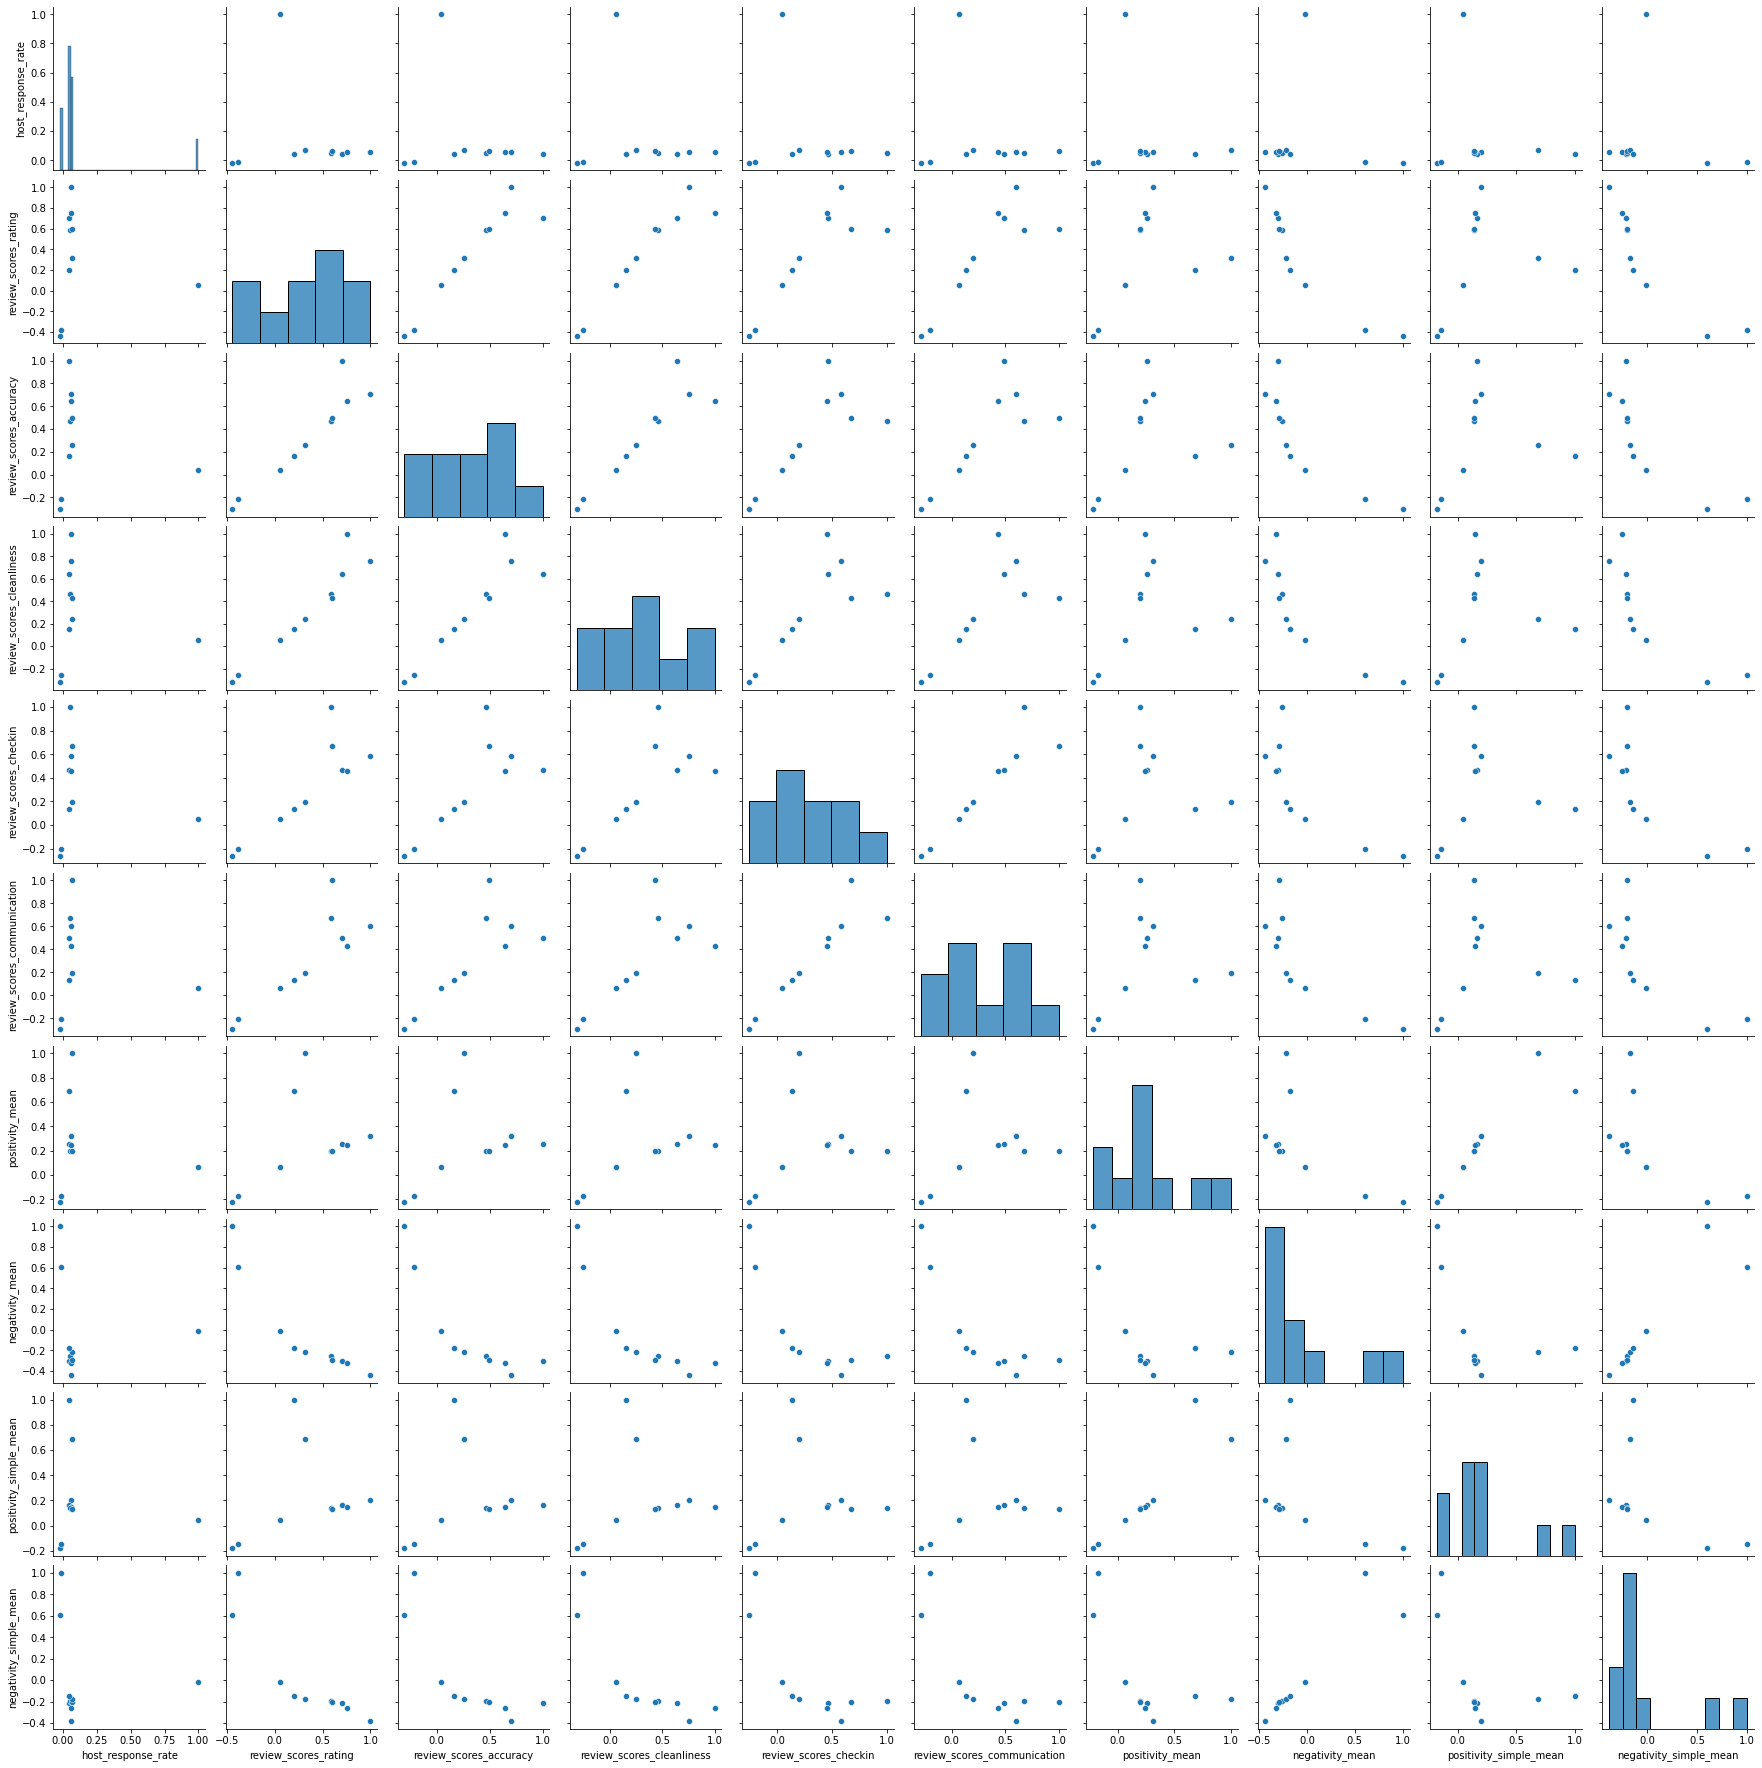

In [94]:
##Correlogram of explanatory variables
sns.pairplot(X_corr_mat)

In [40]:
##Convert principal components from a numpy array to a dataframe
X_train_df = pd.DataFrame(X_train, columns = ["x1","x2","x3"])
X_train_df

,x1,x2,x3
0,-0.255568,0.691178,-0.791709
1,-0.025036,0.040434,0.068330
2,-0.176609,-2.428254,0.363761
3,4.091400,0.925225,-1.281721
4,-2.192659,0.680930,-0.091621
...,...,...,...
2863,-1.319334,-0.158970,-0.743151
2864,-1.723874,-0.515357,-0.527908
2865,-0.951177,-0.191661,-0.084871
2866,-1.198048,-0.198261,-0.818428


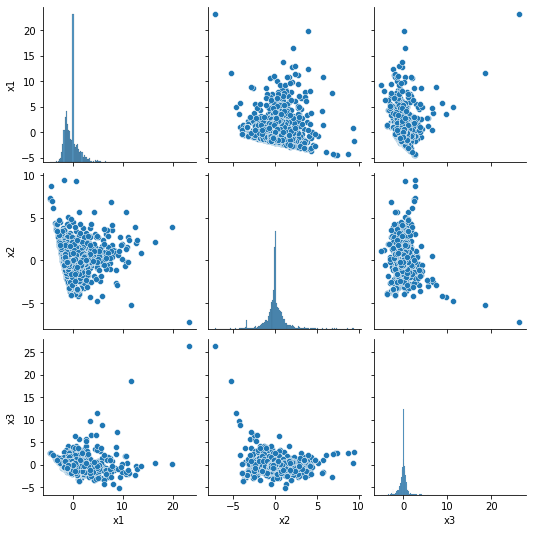

In [41]:
##Pairplot of principal components
sns.pairplot(X_train_df)

In [44]:
##Table of linear regression data from Q6
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              501.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:05:44   Log-Likelihood:                         -22988.
No. Observations:                3585   AIC:                                  4.600e+04
Df Residuals:                    3575   BIC:                                  4.606e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_response_rate             16.4218     19.738      0.832      0.405     -22.277      55.121
review_scores_rating            1.4096      0.579      2.436      0.015       0.275       2.544
review_scores_accuracy         -8.6753      4.363     -1.989      0.047     -17.229      -0.122
review_scores_cleanliness      17.3606      3.788      4.584      0.000       9.934      24.787
review_scores_checkin          -6.6749      5.055     -1.320      0.187     -16.586       3.236
review_scores_communication     0.6594      5.282      0.125      0.901      -9.696      11.015
positivity_mean                 3.3624     42.328      0.079      0.937     -79.627      86.352
negativity_mean                57.5541    154.812      0.372      0.710    -245.975     361.083
positivity_simple_mean         25.4978    118.418      0.215      0.830    -206.677     257.672
negativity_simple_mean        840.9567    521.239      1.613      0.107    -181.000    1862.913
==============================================================================
Omnibus:                     5323.683   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4469811.723
Skew:                           8.649   Prob(JB):                         0.00
Kurtosis:                     175.117   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
##Same as above, but for Q7
results_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.136
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                       0.333
Time:                        13:05:45   Log-Likelihood:                         -19502.
No. Observations:                2868   AIC:                                  3.901e+04
Df Residuals:                    2865   BIC:                                  3.903e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.7654      2.045     -1.842      0.066      -7.774       0.244
x2            -0.2058      3.353     -0.061      0.951      -6.781       6.369
x3            -0.4094      3.624     -0.113      0.910      -7.515       6.696
==============================================================================
Omnibus:                     3325.349   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           843633.098
Skew:                           5.622   Prob(JB):                         0.00
Kurtosis:                      86.266   Cond. No.                         1.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""